In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
#constants
c = 3*10**18
Ndc = 0.002 #dark curren electrons per pixel
Nron = 1.5 #readout noise electrons
d = 3 #arcesc source diameter
A = np.pi * (d/2)**2 #pixel area
Npix = A / 0.55**2 #pixel scale

SkyB_g = 8.11 * 10**(-16) #per filtro g
SkyB_r = 5.47 * 10**(-16) #per filtro r
SkyB_i = 2.15 * 10**(-16) #per filtro i

C = -16.26 #per filtri g, r, i

l_g = 4500 #lambda per filtro g
l_r = 6500 #lambda per filtro r
l_i = 8000 #lambda per filtro i

mag = 18

In [4]:
def N(l):
  F_nu = 10**(-(mag + 48.6)/2.5)
  F_lambda = F_nu *c / l**2
  return F_lambda/10**C

def SNR(N, SkyB, t):
  Nsb = (SkyB/10**C) * 0.55**2
  return N*t / np.sqrt(N*t + Npix*(Nsb*t + Ndc*t + Nron**2))

In [29]:
srn_g = []
srn_r = []
srn_i = []

[srn_g.append(SNR(N(l_g), SkyB_g, i)) for i in np.geomspace(60, 1200, 10)]
[srn_r.append(SNR(N(l_r), SkyB_r, i)) for i in np.geomspace(60, 1200, 10)]
[srn_i.append(SNR(N(l_i), SkyB_i, i)) for i in np.geomspace(60, 1200, 10)]

[None, None, None, None, None, None, None, None, None, None]

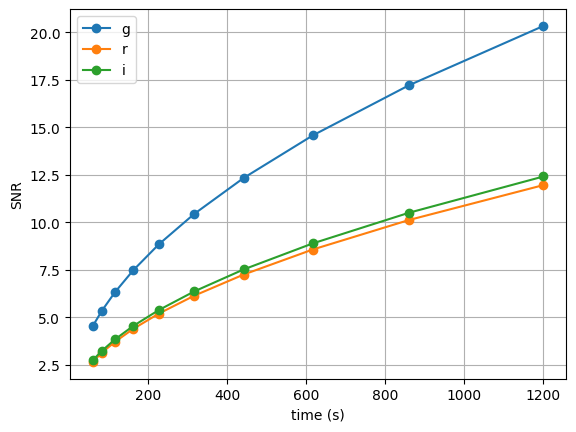

In [31]:
plt.plot(np.geomspace(60, 1200, 10), srn_g, 'o-', '' label = 'g')
plt.plot(np.geomspace(60, 1200, 10), srn_r, 'o-', label = 'r')
plt.plot(np.geomspace(60, 1200, 10), srn_i, 'o-', label = 'i')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('SNR')
plt.grid()
plt.show()